In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # train and test 
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Load the data set
subscriber= pd.read_csv("bankfull.csv")
subscriber.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
subscriber.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
subscriber.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
subscriber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
subscriber.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
subscriber.shape

(45211, 17)

## Converting Object to Category and Encoding it

In [8]:
subscriber['job']=subscriber['job'].astype('category')
subscriber['job']=subscriber['job'].cat.codes # Encoding the job column

subscriber['marital']=subscriber['marital'].astype('category')
subscriber['marital']=subscriber['marital'].cat.codes # Encoding the marital column


subscriber['education']=subscriber['education'].astype('category')
subscriber['education']=subscriber['education'].cat.codes # Encoding the education column


subscriber['default']=subscriber['default'].astype('category')
subscriber['default']=subscriber['default'].cat.codes # Encoding the default column

subscriber['housing']=subscriber['housing'].astype('category')
subscriber['housing']=subscriber['housing'].cat.codes # Encoding the housing column



subscriber['loan']=subscriber['loan'].astype('category')
subscriber['loan']=subscriber['loan'].cat.codes # Encoding the loan column


subscriber['contact']=subscriber['contact'].astype('category')
subscriber['contact']=subscriber['contact'].cat.codes # Encoding the contact column

subscriber['month']=subscriber['month'].astype('category')
subscriber['month']=subscriber['month'].cat.codes # Encoding the month column


subscriber['poutcome']=subscriber['poutcome'].astype('category')
subscriber['poutcome']=subscriber['poutcome'].cat.codes # Encoding the poutcome column


subscriber['y']=subscriber['y'].astype('category')
subscriber['y']=subscriber['y'].cat.codes # Encoding the y column


In [25]:
subscriber.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [9]:
x=subscriber.iloc[:,:17]
y=subscriber.iloc[:,16]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True)

In [11]:
x_train.shape

(31647, 17)

In [12]:
y_train.shape

(31647,)

In [13]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [14]:
classifier.intercept_

array([-0.22578592])

In [15]:
classifier.coef_

array([[ 5.91759737e-03,  7.61845241e-02, -3.02745624e-01,
        -3.28348061e-02, -1.71065895e-02,  7.95880716e-06,
        -5.92067181e-01, -1.68775361e-01, -5.88217227e-01,
        -1.26673581e-02,  1.93360651e-03,  3.96209736e-03,
        -7.98653068e-01, -7.73240308e-03,  3.09451120e-01,
        -5.49883628e-01,  1.66308649e+00]])

In [16]:
#Predict for X dataset
y_pred = classifier.predict(x)

In [22]:
y_pred_df= pd.DataFrame({'actual': y,
                         'predictions': classifier.predict(x)})
y_pred_df

,actual,predictions
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


In [23]:
TP=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==1)])
TN=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==0)])
FP=len(y_pred_df[(y_pred_df['actual']==0) & (y_pred_df['predictions']==1)])
FN=len(y_pred_df[(y_pred_df['actual']==1) & (y_pred_df['predictions']==0)])

In [24]:
print('True Positives', TP)
print('True Negatives',TN)
print('False Positives', FP)
print('False Negatives', FN)

True Positives 2676
True Negatives 39065
False Positives 857
False Negatives 2613


In [18]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix = confusion_matrix(y,y_pred)
print (confusion_matrix)

[[39065   857]
 [ 2613  2676]]


In [19]:
ac(y,y_pred) # accuracy of prediction with the model

0.9232487668930127

In [20]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     39922
           1       0.76      0.51      0.61      5289

    accuracy                           0.92     45211
   macro avg       0.85      0.74      0.78     45211
weighted avg       0.92      0.92      0.92     45211



# ROC Curve

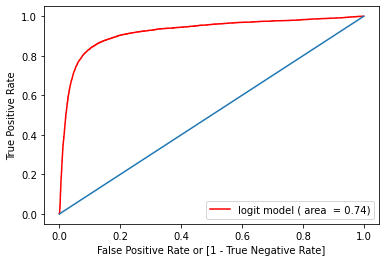

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba (x)[:,1])

auc = roc_auc_score(y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="best")
plt.show()